#Proyecto

Utiliza la interfaz proporcionada por tu profesor para generar las matrices de características de tus datos, con los cuales vas a trabajar en las siguientes etapas de tu proyecto. En total, debes contar con los siguientes archivos:

1. Para el experimento de tareas cognitivas, debes tener 3 archivos de características, uno por cada integrante de tu equipo.

2. Para el experimento con el potencial P300, debes tener 2 archivos, de preferencia de sujetos distintos, con los cuales obtengas al menos 0.7 de sensibilidad por clase con la interfaz cerebro-computadora.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###IMPORTAMOS LIBRERÍAS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, neighbors
from sklearn.svm import SVC, SVR
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif, SequentialFeatureSelector, RFE
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

###CREAMOS BASE DE DATOS

In [ ]:
cogR = pd.read_csv("/content/drive/MyDrive/Datosquefuncionan/ex2verdaderop1raul.txt", header=None, delimiter = "\t")
P300A = pd.read_csv("/content/drive/MyDrive/Datosquefuncionan/ex1verdaderop2tono.txt", header=None, delimiter = "\t")
cogA = pd.read_csv("/content/drive/MyDrive/Datosquefuncionan/ex2verdaderop1tono.txt", header=None, delimiter = "\t")
P300M = pd.read_csv("/content/drive/MyDrive/Datosquefuncionan/ex1verdaderop1mayra.txt", header=None, delimiter = "\t")
cogM = pd.read_csv("/content/drive/MyDrive/Datosquefuncionan/ex2verdaderop2mayra.txt", header=None, delimiter = "\t")

In [ ]:
cogR = cogR.dropna(axis=1)
P300A = P300A.dropna(axis=1)
cogA = cogA.dropna(axis=1)
P300M = P300M.dropna(axis=1)
cogM = cogM.dropna(axis=1)

###CREAMOS FUNCIONES CON CLASIFICADORES



In [ ]:
#CLASIFICADOR SVM, VISTO EN CLASE
def svm_classifier(x, y):

    # Separación de datos
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Crear un clasificador SVM
    classifier = svm.SVC()

    # Ajustar el clasificador a los datos de entrenamiento
    classifier.fit(x_train, y_train)

    # Predecir las etiquetas para los datos de entrenamiento
    y_pred = classifier.predict(x_test)

    # Imprimir el informe del clasificador
    print(classification_report(y_test, y_pred, zero_division=1))

#CLASIFICADOR KNN, VISTO EN CLASE
def knn_classifier(x, y, k):

    # Separación de datos
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Crear un clasificador KNN
    classifier = KNeighborsClassifier(n_neighbors = int(k))

    # Ajustar el clasificador a los datos de entrenamiento
    classifier.fit(x_train, y_train)

    # Predecir las etiquetas para los datos de entrenamiento
    y_pred = classifier.predict(x_test)

    # Imprimir el informe del clasificador
    print(classification_report(y_test, y_pred, zero_division=1))

#CLASIFICADOR MLP, VISTO EN CLASE
def perceptron(x , y, capas):

  clf = MLPClassifier(hidden_layer_sizes=capas, max_iter=10000)  # hidden_layer_sizes controls the number of neurons of each hidden layer.
  clf.fit(x, y)


  # 5-fold cross-validation
  kf = StratifiedKFold(n_splits=5, shuffle = True)

  cv_y_test = []
  cv_y_pred = []

  for train_index, test_index in kf.split(x, y):

      # Training phase
      x_train = x[train_index, :]
      y_train = y[train_index]

      clf_i = MLPClassifier(hidden_layer_sizes=capas, max_iter=10000)
      clf_i.fit(x_train, y_train)

      # Test phase
      x_test = x[test_index, :]
      y_test = y[test_index]
      y_pred = clf_i.predict(x_test)

      cv_y_test.append(y_test)
      cv_y_pred.append(y_pred)

      print(classification_report(y_test, y_pred, zero_division=1))

  # Model performance
  print("Resultados del clasificador:\n\n", classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

#CLASIFICADOR DECISION TREE CLASSIFIER, NO VISTO EN CLASE
def DTC_classifier(x, y):

    # Separación de datos
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Crear un clasificador DTC
    classifier = DecisionTreeClassifier(random_state=0)

    # Ajustar el clasificador a los datos de entrenamiento
    classifier.fit(x_train, y_train)

    # Predecir las etiquetas para los datos de entrenamiento
    y_pred = classifier.predict(x_test)

    # Imprimir el informe del clasificador
    print(classification_report(y_test, y_pred, zero_division=1))

#CLASIFICADOR RANDOM FOREST CLASSIFIER, NO VISTO EN CLASE
def RFC_classifier(x, y):

    # Separación de datos
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Crear un clasificador RFC
    classifier = RandomForestClassifier()

    # Ajustar el clasificador a los datos de entrenamiento
    classifier.fit(x_train, y_train)

    # Predecir las etiquetas para los datos de entrenamiento
    y_pred = classifier.predict(x_test)

    # Imprimir el informe del clasificador
    print(classification_report(y_test, y_pred, zero_division=1))

Evaluación de algoritmos de clasificación

Para esta etapa del proyecto considera los siguientes casos:

- Clasificación de potencial P300 vs no potencial P300. En este caso, deben de tener al menos 2 archivos de características.

- Clasificación de no tarea cognitiva (cruz) vs tarea cognitiva. En este caso, deben tener al menos 3 archivos de características.

- Clasificación de tarea de cálculo (9-12) vs tarea de lectura (5-8) vs tarea de nombres de cosas (1-4). En este caso, deben tener al menos 3 archivos de datos.


## Puntos 1 y 2:

1. Evalúe el rendimiento de los modelos de clasificación SVM, K-NN, y MLP (de al menos 2 capas). Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

2. Seleccione dos modelos de clasificación no vistos en clase, y evalúelos con sus conjuntos de datos. Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

###Clasificación de potencial P300 vs no potencial P300

In [ ]:
# Datos de entrenamiento: P300 ANTONIO
xA = P300A.iloc[:,1:].values
yA = P300A.iloc[:,0].values

# Datos de entrenamiento: P300 MAYRA
xM = P300M.iloc[:,1:].values
yM = P300M.iloc[:,0].values


ANTONIO P300:





In [ ]:
print("SVM")
svm_classifier(xA, yA)
print("KNN")
knn_classifier(xA, yA, 8)
print("MLP")
perceptron(xA, yA, 3)
print("Decision Tree")
DTC_classifier(xA, yA)
print("Random Forest")
RFC_classifier(xA, yA)

MAYRA P300:




In [ ]:
print("SVM")
svm_classifier(xM, yM)
print("KNN")
knn_classifier(xM, yM, 8)
print("MLP")
perceptron(xM, yM, 3)
print("Decision Tree")
DTC_classifier(xM, yM)
print("Random Forest")
RFC_classifier(xM, yM)

###Clasificación de tarea de cálculo (9-12) vs tarea de lectura (5-8) vs tarea de nombres de cosas (1-4)

In [ ]:
transformacion = lambda x: 1 if 1 <= x <= 4 else 2 if 5 <= x <= 8 else 3 if 9 <= x <= 12 else 4

# Datos de entrenamiento: COGNITIVO ANTONIO
cogA[0] = cogA[0].map(transformacion)

xAc = cogA.iloc[:,1:].values
yAc = cogA.iloc[:,0].values

# Datos de entrenamiento: COGNITIVO MAYRA
cogM[0] = cogM[0].map(transformacion)

xMc = cogM.iloc[:,1:].values
yMc = cogM.iloc[:,0].values

# Datos de entrenamiento: COGNITIVO RAUL
cogR[0] = cogR[0].map(transformacion)

xRc = cogR.iloc[:,1:].values
yRc = cogR.iloc[:,0].values

Tareas cognitivas Antonio

In [ ]:
print("SVM")
svm_classifier(xAc, yAc)
print("KNN")
knn_classifier(xAc, yAc, 8)
print("MLP")
perceptron(xAc, yAc, 3)
print("Decision Tree")
DTC_classifier(xAc, yAc)
print("Random Forest")
RFC_classifier(xAc, yAc)

Tareas cognitivas Mayra

In [ ]:
print("SVM")
svm_classifier(xMc, yMc)
print("KNN")
knn_classifier(xMc, yMc, 8)
print("MLP")
perceptron(xMc, yMc, 3)
print("Decision Tree")
DTC_classifier(xMc, yMc)
print("Random Forest")
RFC_classifier(xMc, yMc)

Tareas cognitivas Raul

In [ ]:
print("SVM")
svm_classifier(xRc, yRc)
print("KNN")
knn_classifier(xRc, yRc, 8)
print("MLP")
perceptron(xRc, yRc, 3)
print("Decision Tree")
DTC_classifier(xRc, yRc)
print("Random Forest")
RFC_classifier(xRc, yRc)

SVM
              precision    recall  f1-score   support

           1       1.00      0.00      0.00        11
           2       1.00      0.00      0.00        10
           3       1.00      0.00      0.00        13
           4       0.38      1.00      0.55        21

    accuracy                           0.38        55
   macro avg       0.85      0.25      0.14        55
weighted avg       0.76      0.38      0.21        55

KNN
              precision    recall  f1-score   support

           1       0.70      0.64      0.67        11
           2       1.00      0.90      0.95        10
           3       0.75      0.23      0.35        13
           4       0.59      0.90      0.72        21

    accuracy                           0.69        55
   macro avg       0.76      0.67      0.67        55
weighted avg       0.73      0.69      0.66        55

MLP
              precision    recall  f1-score   support

           1       0.20      0.08      0.12        12
         

###Clasificación de no tarea cognitiva (cruz) vs tarea cognitiva

In [ ]:
#Como se sobreescribe con respecto al anterior se pone esta nueva transformación.
transformacion = lambda x: 1 if 1 <= x <= 3 else 4

# Datos de entrenamiento: COGNITIVO ANTONIO
cogA[0] = cogA[0].map(transformacion)

xAcc = cogA.iloc[:,1:].values
yAcc = cogA.iloc[:,0].values

# Datos de entrenamiento: COGNITIVO MAYRA
cogM[0] = cogM[0].map(transformacion)

xMcc = cogM.iloc[:,1:].values
yMcc = cogM.iloc[:,0].values

# Datos de entrenamiento: COGNITIVO RAUL
cogR[0] = cogR[0].map(transformacion)

xRcc = cogR.iloc[:,1:].values
yRcc = cogR.iloc[:,0].values

Tarea Cognitivas vs no cognitivas Antonio

In [ ]:
print("SVM")
svm_classifier(xAcc, yAcc)
print("KNN")
knn_classifier(xAcc, yAcc, 8)
print("MLP")
perceptron(xAcc, yAcc, 3)
print("Decision Tree")
DTC_classifier(xAcc, yAcc)
print("Random Forest")
RFC_classifier(xAcc, yAcc)

Tarea Cognitivas vs no cognitivas Mayra

In [ ]:
print("SVM")
svm_classifier(xMcc, yMcc)
print("KNN")
knn_classifier(xMcc, yMcc, 8)
print("MLP")
perceptron(xMcc, yMcc, 3)
print("Decision Tree")
DTC_classifier(xMcc, yMcc)
print("Random Forest")
RFC_classifier(xMcc, yMcc)

Tarea cognitivas vs no cognitivas Raul

In [ ]:
print("SVM")
svm_classifier(xRcc, yRcc)
print("KNN")
knn_classifier(xRcc, yRcc, 8)
print("MLP")
perceptron(xRcc, yRcc, 3)
print("Decision Tree")
DTC_classifier(xRcc, yRcc)
print("Random Forest")
RFC_classifier(xRcc, yRcc)

## Punto 3. Indique qué modelos de clasificación de los que evaluó anteriormente tienen hiperparámetros y cuáles son éstos en cada caso. Seleccione uno de estos clasificadores, y determine sus hiperparámetros óptimos.

### SVM (Support Vector Machines):

SVM es un clasificador que busca encontrar un hiperplano óptimo para separar los datos en diferentes clases. Busca maximizar el margen entre las clases y utiliza vectores de soporte, que son los puntos de datos más cercanos al hiperplano de separación

C: Controla el balance entre la clasificación correcta y la maximización del margen. Un valor más alto de C permite una clasificación más precisa pero puede llevar a un sobreajuste.

Kernel: Define la función de transformación que se utiliza para mapear los datos a un espacio dimensional superior. Los kernels comunes incluyen lineal, polinómico y radial basis function (RBF).

### KNN (K-Nearest Neighbors):

KNN clasifica un punto de datos desconocido asignándole la etiqueta de clase más común entre sus vecinos más cercanos en el espacio de características. Los vecinos se seleccionan según una medida de distancia, generalmente la distancia euclidiana.

K: Especifica el número de vecinos más cercanos que se consideran al realizar una clasificación. Un valor más alto de K suaviza la decisión y puede reducir el ruido, pero también puede llevar a una clasificación menos precisa.

### MLP (Multilayer Perceptron):

MLP es una red neuronal artificial que consta de múltiples capas de unidades llamadas neuronas. Las neuronas se organizan en capas de entrada, ocultas y de salida, y utilizan una función de activación para introducir no linealidad. El MLP aprende a través de retropropagación del error y ajusta los pesos de las conexiones para mejorar la precisión de la clasificación.

Número y tamaño de las capas ocultas: Especifica el número de capas ocultas y el número de neuronas en cada capa oculta. Más capas y neuronas pueden aumentar la capacidad del modelo, pero también pueden conducir a un sobreajuste.

Función de activación: Define la función que se aplica a la salida de cada neurona. Algunas funciones comunes incluyen la función sigmoide, la función ReLU y la función tangente hiperbólica.

### Decision Tree/Árbol de decisión:

Un árbol de decisión divide repetidamente el conjunto de datos en subconjuntos más pequeños según las características relevantes. Cada división se basa en una regla o criterio que maximiza la homogeneidad dentro de cada subconjunto y la heterogeneidad entre los subconjuntos.

Criterio de división: Especifica el criterio utilizado para medir la calidad de una división. Algunos criterios comunes son la ganancia de información (information gain) y el índice Gini.

Profundidad máxima del árbol: Controla la cantidad máxima de divisiones o niveles en el árbol. Un árbol más profundo puede capturar relaciones más complejas en los datos, pero también puede llevar a un sobreajuste.

###Random Forest:

Un Random Forest es un conjunto de árboles de decisión. Cada árbol se entrena con una muestra aleatoria del conjunto de datos y realiza una clasificación individual. La clasificación final se obtiene por votación o promediado de las clasificaciones de los árboles individuales.

Número de árboles: Especifica la cantidad de árboles de decisión en el bosque. Un mayor número de árboles generalmente reduce el sobreajuste y mejora la precisión, pero también aumenta el costo computacional.

Tamaño de muestra: Controla el tamaño de la muestra utilizada para entrenar cada árbol individual. Un tamaño de muestra más pequeño puede introducir variabilidad y aumentar la diversidad del bosque.

In [ ]:
# Hiperparámetros de los modelos de clasificación evaluados anteriormente
# Modelos de clasificación
models = {
    'SVM': svm.SVC(),
    'K-NN': neighbors.KNeighborsClassifier(),
    'MLP': MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000)
}

hyperparameters = {
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'K-NN': {
        'n_neighbors': [3, 5, 7],
    },
    'MLP': {
        'hidden_layer_sizes': [(16,), (16, 8), (32, 16)],
        'activation': ['relu', 'logistic']
    }
}

# Ajuste de hiperparámetros óptimos para el modelo seleccionado (SVM)
grid_search = GridSearchCV(models['SVM'], hyperparameters['SVM'], cv=3)
grid_search.fit(xA, yA)

# Hiperparámetros óptimos encontrados
best_params = grid_search.best_params_

print(f"Hiperparámetros óptimos para {'SVM'}:")
print(best_params)
print()

Hiperparámetros óptimos para SVM:
{'C': 0.1, 'kernel': 'linear'}



Utilizamos la función GridSearch para encontrar los mejores parámetros. Aquí lo probamos con el clasificador SVM, conocido por tener éxito en pruebas de P300. nos define como mejores parámetros una C baja y un kernel linear.

Adicionalmente hacemos varias pruebas para el clasificador K-NN para probar las mejores K:

In [ ]:
for i in range(1, 9):
  print(f"\nPara k {i} los resultados son: ")
  knn_classifier(xA, yA, i)


Para k 1 los resultados son: 
              precision    recall  f1-score   support

           1       0.38      0.32      0.34        57
           2       0.83      0.86      0.85       222

    accuracy                           0.75       279
   macro avg       0.60      0.59      0.60       279
weighted avg       0.74      0.75      0.74       279


Para k 2 los resultados son: 
              precision    recall  f1-score   support

           1       0.44      0.65      0.52        57
           2       0.90      0.79      0.84       222

    accuracy                           0.76       279
   macro avg       0.67      0.72      0.68       279
weighted avg       0.80      0.76      0.78       279


Para k 3 los resultados son: 
              precision    recall  f1-score   support

           1       0.57      0.35      0.43        57
           2       0.85      0.93      0.89       222

    accuracy                           0.81       279
   macro avg       0.71      0.64  

## Punto 4. Para uno de los modelos de clasificación, aplique un método de selección de características. Indique cuantas características son suficientes para obtener buenos resultados.

###P300 ANTONIO

--------------- Filter feature selection, k = 1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ACC:  0.8 Recall:  [0. 1.] Precision:  [0.  0.8]
--------------- Filter feature selection, k = 2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ACC:  0.8 Recall:  [0. 1.] Precision:  [0.  0.8]
--------------- Filter feature selection, k = 3
ACC:  0.8258064516129032 Recall:  [0.2078853  0.98028674] Precision:  [0.725      0.83193916]
--------------- Filter feature selection, k = 4
ACC:  0.839426523297491 Recall:  [0.3046595  0.97311828] Precision:  [0.73913043 0.8484375 ]
--------------- Filter feature selection, k = 5
ACC:  0.8594982078853046 Recall:  [0.44444444 0.96326165] Precision:  [0.75151515 0.87398374]
--------------- Filter feature selection, k = 6
ACC:  0.8652329749103943 Recall:  [0.43727599 0.97222222] Precision:  [0.79738562 0.87359098]
--------------- Filter feature selection, k = 7
ACC:  0.8695340501792115 Recall:  [0.48387097 0.96594982] Precision:  [0.78034682 0.88216039]
--------------- Filter feature selection, k = 8
ACC:  0.864516129032258 Recall:  [0.4874552  0.95878136] Precision:  [0.74725275 0.88211047]
--------------- Filter feature selection, k = 9
ACC:  0.8637992831541219 Recall:  [0.49103943 0.95698

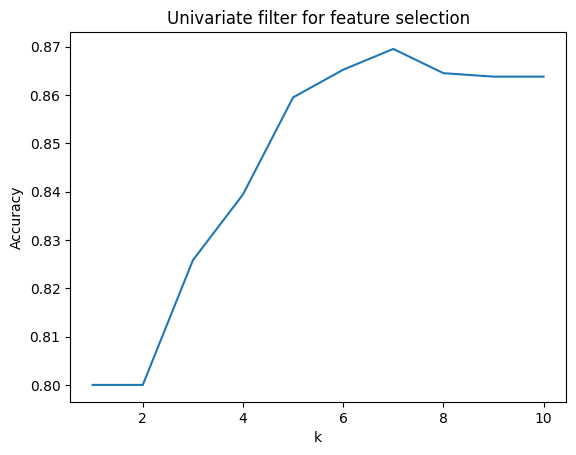

In [ ]:
# Use the filter approach for feature selection
ks = np.arange(1, 11, 1)
accs = []
clf = SVC(kernel='linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)
for k in ks:
    print('--------------- Filter feature selection, k =', k)

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(xA, yA):

       # Training phase
        x_train = xA[train_index, :]
        y_train = yA[train_index]

        ffs = SelectKBest(mutual_info_classif, k=k)
        ffs.fit(x_train, y_train)
        x_train = ffs.transform(x_train)

        clf.fit(x_train, y_train)

        # Test phase
        x_test = ffs.transform(xA[test_index, :])
        y_test = yA[test_index]
        y_pred = clf.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    acc = accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))
    rec = recall_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)
    pre = precision_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)

    print('ACC: ', acc, 'Recall: ', rec, 'Precision: ', pre)
    accs.append(acc)

plt.plot(ks, accs)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Univariate filter for feature selection')
plt.show()


###P300 MAYRA

--------------- Filter feature selection, k = 1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ACC:  0.7982456140350878 Recall:  [0. 1.] Precision:  [0.         0.79824561]
--------------- Filter feature selection, k = 2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ACC:  0.7982456140350878 Recall:  [0. 1.] Precision:  [0.         0.79824561]
--------------- Filter feature selection, k = 3
ACC:  0.8070175438596491 Recall:  [0.05434783 0.99725275] Precision:  [0.83333333 0.80666667]
--------------- Filter feature selection, k = 4
ACC:  0.8004385964912281 Recall:  [0.06521739 0.98626374] Precision:  [0.54545455 0.80674157]
--------------- Filter feature selection, k = 5
ACC:  0.8092105263157895 Recall:  [0.15217391 0.97527473] Precision:  [0.60869565 0.81986143]
--------------- Filter feature selection, k = 6
ACC:  0.8070175438596491 Recall:  [0.11956522 0.98076923] Precision:  [0.61111111 0.81506849]
--------------- Filter feature selection, k = 7
ACC:  0.831140350877193 Recall:  [0.23913043 0.98076923] Precision:  [0.75862069 0.83606557]
--------------- Filter feature selection, k = 8
ACC:  0.8114035087719298 Recall:  [0.26086957 0.95054945] Precision:  [0.57142857 0.83574879]
--------------- Filter feature selection, k = 9
ACC:  0.835526315789473

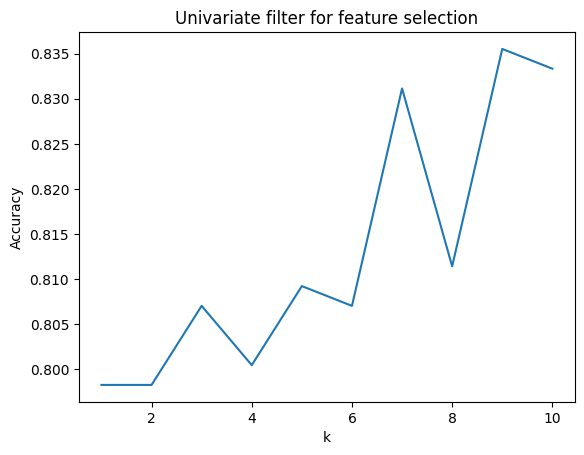

In [ ]:
# Use the filter approach for feature selection
ks = np.arange(1, 11, 1)
accs = []
clf = SVC(kernel='linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)
for k in ks:
    print('--------------- Filter feature selection, k =', k)

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(xM, yM):

       # Training phase
        x_train = xM[train_index, :]
        y_train = yM[train_index]

        ffs = SelectKBest(mutual_info_classif, k=k)
        ffs.fit(x_train, y_train)
        x_train = ffs.transform(x_train)

        clf.fit(x_train, y_train)

        # Test phase
        x_test = ffs.transform(xM[test_index, :])
        y_test = yM[test_index]
        y_pred = clf.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    acc = accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))
    rec = recall_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)
    pre = precision_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)

    print('ACC: ', acc, 'Recall: ', rec, 'Precision: ', pre)
    accs.append(acc)

plt.plot(ks, accs)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Univariate filter for feature selection')
plt.show()

###Cognitivas Antonio

--------------- Filter feature selection, k = 1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ACC:  0.39492753623188404 Recall:  [0.03571429 0.16071429 0.         0.90740741] Precision:  [0.4        0.33333333 0.         0.40163934]
--------------- Filter feature selection, k = 2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ACC:  0.40942028985507245 Recall:  [0.05357143 0.10714286 0.         0.96296296] Precision:  [0.5        0.5        0.         0.40310078]
--------------- Filter feature selection, k = 3
ACC:  0.4420289855072464 Recall:  [0.08928571 0.32142857 0.         0.91666667] Precision:  [0.625      0.41860465 0.         0.44196429]
--------------- Filter feature selection, k = 4
ACC:  0.41304347826086957 Recall:  [0.03571429 0.35714286 0.01785714 0.84259259] Precision:  [0.22222222 0.39215686 0.16666667 0.43333333]
--------------- Filter feature selection, k = 5
ACC:  0.4311594202898551 Recall:  [0.10714286 0.35714286 0.05357143 0.83333333] Precision:  [0.4        0.34482759 0.27272727 0.46875   ]
--------------- Filter feature selection, k = 6
ACC:  0.4782608695652174 Recall:  [0.14285714 0.5        0.03571429 0.87037037] Precision:  [0.5        0.45901639 0.22222222 0.49473684]
--------------- Filter feature selection, k = 7
ACC:  0.45652173913043476 Recall:  [0.10714286 0.55357143 0.03571429

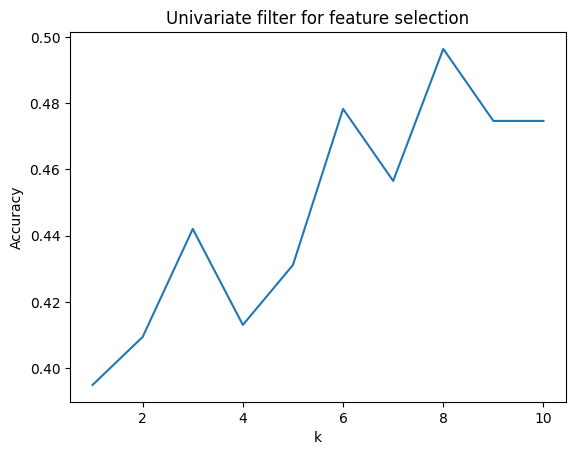

In [ ]:
# Use the filter approach for feature selection
ks = np.arange(1, 11, 1)
accs = []
clf = SVC(kernel='linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)
for k in ks:
    print('--------------- Filter feature selection, k =', k)

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(xAc, yAc):

       # Training phase
        x_train = xAc[train_index, :]
        y_train = yAc[train_index]

        ffs = SelectKBest(mutual_info_classif, k=k)
        ffs.fit(x_train, y_train)
        x_train = ffs.transform(x_train)

        clf.fit(x_train, y_train)

        # Test phase
        x_test = ffs.transform(xAc[test_index, :])
        y_test = yAc[test_index]
        y_pred = clf.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    acc = accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))
    rec = recall_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)
    pre = precision_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)

    print('ACC: ', acc, 'Recall: ', rec, 'Precision: ', pre)
    accs.append(acc)

plt.plot(ks, accs)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Univariate filter for feature selection')
plt.show()

###Cognitivas MAYRA

--------------- Filter feature selection, k = 1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ACC:  0.44 Recall:  [0.         0.53571429 0.         0.85046729] Precision:  [0.         0.46153846 0.         0.43333333]
--------------- Filter feature selection, k = 2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ACC:  0.4618181818181818 Recall:  [0.         0.66071429 0.         0.8411215 ] Precision:  [0.         0.50684932 0.         0.45454545]
--------------- Filter feature selection, k = 3
ACC:  0.44 Recall:  [0.         0.53571429 0.         0.85046729] Precision:  [0.         0.48387097 0.         0.44390244]
--------------- Filter feature selection, k = 4
ACC:  0.44727272727272727 Recall:  [0.01785714 0.53571429 0.03571429 0.8411215 ] Precision:  [0.16666667 0.48387097 0.22222222 0.45454545]
--------------- Filter feature selection, k = 5
ACC:  0.4690909090909091 Recall:  [0.01785714 0.57142857 0.03571429 0.87850467] Precision:  [1.         0.52459016 0.18181818 0.46534653]
--------------- Filter feature selection, k = 6
ACC:  0.44727272727272727 Recall:  [0.         0.58928571 0.07142857 0.80373832] Precision:  [0.         0.50769231 0.17391304 0.47252747]
--------------- Filter feature selection, k = 7
ACC:  0.4909090909090909 Recall:  [0.05357143 0.67857143 0.08928571 0.8317757 ] Pr

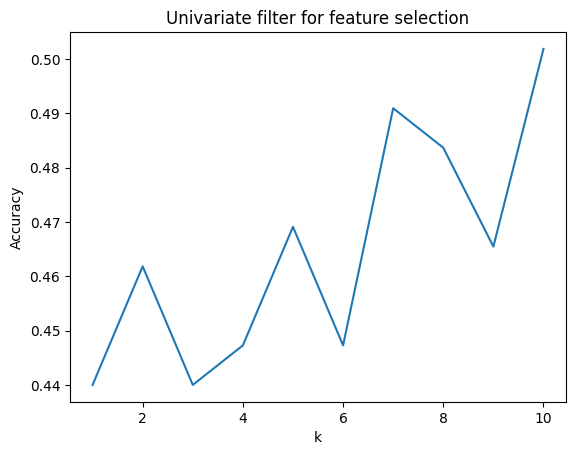

In [ ]:
# Use the filter approach for feature selection
ks = np.arange(1, 11, 1)
accs = []
clf = SVC(kernel='linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)
for k in ks:
    print('--------------- Filter feature selection, k =', k)

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(xMc, yMc):

       # Training phase
        x_train = xMc[train_index, :]
        y_train = yMc[train_index]

        ffs = SelectKBest(mutual_info_classif, k=k)
        ffs.fit(x_train, y_train)
        x_train = ffs.transform(x_train)

        clf.fit(x_train, y_train)

        # Test phase
        x_test = ffs.transform(xMc[test_index, :])
        y_test = yMc[test_index]
        y_pred = clf.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    acc = accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))
    rec = recall_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)
    pre = precision_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)

    print('ACC: ', acc, 'Recall: ', rec, 'Precision: ', pre)
    accs.append(acc)

plt.plot(ks, accs)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Univariate filter for feature selection')
plt.show()

###Cognitivas Raúl

--------------- Filter feature selection, k = 1
ACC:  0.5714285714285714 Recall:  [0.16071429 0.73214286 0.14285714 0.93333333] Precision:  [0.32142857 0.65079365 0.2962963  0.63225806]
--------------- Filter feature selection, k = 2
ACC:  0.5531135531135531 Recall:  [0.08928571 0.73214286 0.19642857 0.8952381 ] Precision:  [0.2173913  0.67213115 0.28205128 0.62666667]
--------------- Filter feature selection, k = 3
ACC:  0.5897435897435898 Recall:  [0.17857143 0.78571429 0.23214286 0.8952381 ] Precision:  [0.37037037 0.6984127  0.38235294 0.63087248]
--------------- Filter feature selection, k = 4
ACC:  0.5860805860805861 Recall:  [0.23214286 0.76785714 0.17857143 0.8952381 ] Precision:  [0.41935484 0.68253968 0.3030303  0.64383562]
--------------- Filter feature selection, k = 5
ACC:  0.6153846153846154 Recall:  [0.21428571 0.80357143 0.28571429 0.9047619 ] Precision:  [0.4137931  0.69230769 0.45714286 0.65972222]
--------------- Filter feature selection, k = 6
ACC:  0.60073260073260

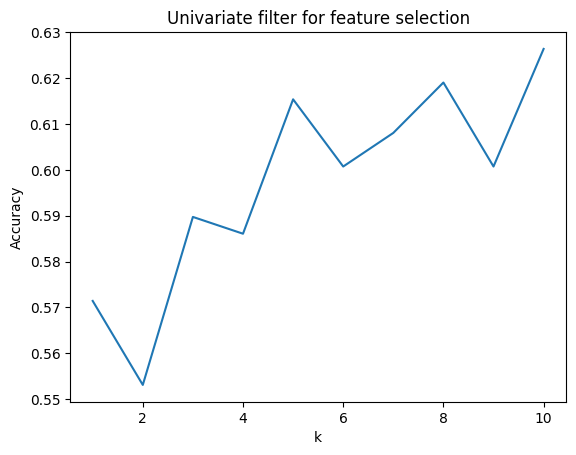

In [ ]:
# Use the filter approach for feature selection
ks = np.arange(1, 11, 1)
accs = []
clf = SVC(kernel='linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)
for k in ks:
    print('--------------- Filter feature selection, k =', k)

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(xRc, yRc):

       # Training phase
        x_train = xRc[train_index, :]
        y_train = yRc[train_index]

        ffs = SelectKBest(mutual_info_classif, k=k)
        ffs.fit(x_train, y_train)
        x_train = ffs.transform(x_train)

        clf.fit(x_train, y_train)

        # Test phase
        x_test = ffs.transform(xRc[test_index, :])
        y_test = yRc[test_index]
        y_pred = clf.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    acc = accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))
    rec = recall_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)
    pre = precision_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)

    print('ACC: ', acc, 'Recall: ', rec, 'Precision: ', pre)
    accs.append(acc)

plt.plot(ks, accs)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Univariate filter for feature selection')
plt.show()

###Cognitivas vs no cognitivas Antonio

--------------- Filter feature selection, k = 1
ACC:  0.6159420289855072 Recall:  [0.94642857 0.10185185] Precision:  [0.62109375 0.55      ]
--------------- Filter feature selection, k = 2
ACC:  0.6231884057971014 Recall:  [0.95833333 0.10185185] Precision:  [0.62403101 0.61111111]
--------------- Filter feature selection, k = 3
ACC:  0.644927536231884 Recall:  [0.91666667 0.22222222] Precision:  [0.64705882 0.63157895]
--------------- Filter feature selection, k = 4
ACC:  0.6594202898550725 Recall:  [0.86309524 0.34259259] Precision:  [0.6712963  0.61666667]
--------------- Filter feature selection, k = 5
ACC:  0.6630434782608695 Recall:  [0.85714286 0.36111111] Precision:  [0.67605634 0.61904762]
--------------- Filter feature selection, k = 6
ACC:  0.6594202898550725 Recall:  [0.78571429 0.46296296] Precision:  [0.69473684 0.58139535]
--------------- Filter feature selection, k = 7
ACC:  0.6630434782608695 Recall:  [0.80357143 0.44444444] Precision:  [0.69230769 0.59259259]
-------

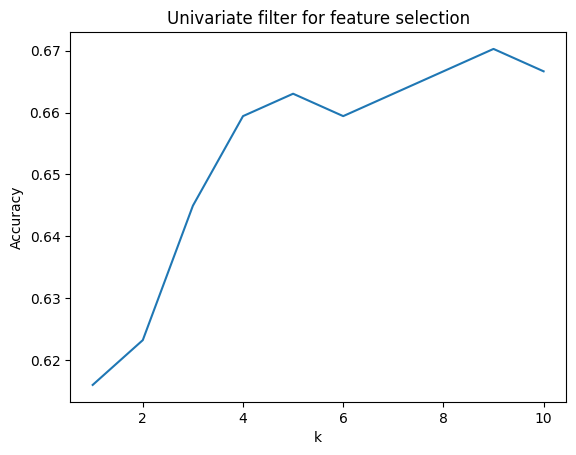

In [ ]:
# Use the filter approach for feature selection
ks = np.arange(1, 11, 1)
accs = []
clf = SVC(kernel='linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)
for k in ks:
    print('--------------- Filter feature selection, k =', k)

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(xAcc, yAcc):

       # Training phase
        x_train = xAcc[train_index, :]
        y_train = yAcc[train_index]

        ffs = SelectKBest(mutual_info_classif, k=k)
        ffs.fit(x_train, y_train)
        x_train = ffs.transform(x_train)

        clf.fit(x_train, y_train)

        # Test phase
        x_test = ffs.transform(xAcc[test_index, :])
        y_test = yAcc[test_index]
        y_pred = clf.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    acc = accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))
    rec = recall_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)
    pre = precision_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)

    print('ACC: ', acc, 'Recall: ', rec, 'Precision: ', pre)
    accs.append(acc)

plt.plot(ks, accs)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Univariate filter for feature selection')
plt.show()

###Cognitivas vs no cognitivas MAYRA

--------------- Filter feature selection, k = 1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ACC:  0.610909090909091 Recall:  [1. 0.] Precision:  [0.61090909 0.        ]
--------------- Filter feature selection, k = 2
ACC:  0.6290909090909091 Recall:  [0.98809524 0.06542056] Precision:  [0.62406015 0.77777778]
--------------- Filter feature selection, k = 3
ACC:  0.6327272727272727 Recall:  [0.92857143 0.1682243 ] Precision:  [0.63673469 0.6       ]
--------------- Filter feature selection, k = 4
ACC:  0.6145454545454545 Recall:  [0.83333333 0.27102804] Precision:  [0.64220183 0.50877193]
--------------- Filter feature selection, k = 5
ACC:  0.6472727272727272 Recall:  [0.81547619 0.38317757] Precision:  [0.67487685 0.56944444]
--------------- Filter feature selection, k = 6
ACC:  0.6654545454545454 Recall:  [0.88095238 0.3271028 ] Precision:  [0.67272727 0.63636364]
--------------- Filter feature selection, k = 7
ACC:  0.6618181818181819 Recall:  [0.875     0.3271028] Precision:  [0.67123288 0.625     ]
--------------- Filter feature selection, k = 8
ACC:  0.6436363636363637 

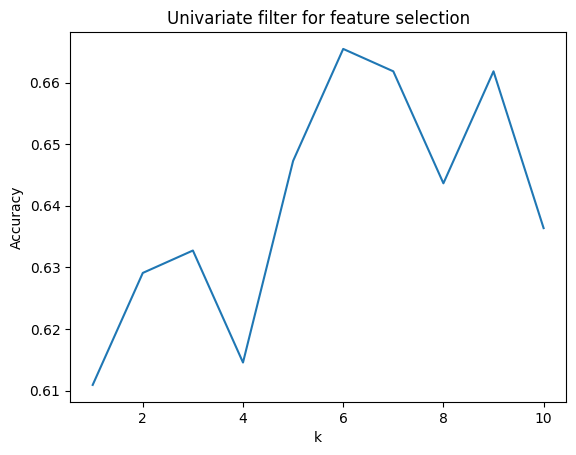

In [ ]:
# Use the filter approach for feature selection
ks = np.arange(1, 11, 1)
accs = []
clf = SVC(kernel='linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)
for k in ks:
    print('--------------- Filter feature selection, k =', k)

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(xMcc, yMcc):

       # Training phase
        x_train = xMcc[train_index, :]
        y_train = yMcc[train_index]

        ffs = SelectKBest(mutual_info_classif, k=k)
        ffs.fit(x_train, y_train)
        x_train = ffs.transform(x_train)

        clf.fit(x_train, y_train)

        # Test phase
        x_test = ffs.transform(xMcc[test_index, :])
        y_test = yMcc[test_index]
        y_pred = clf.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    acc = accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))
    rec = recall_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)
    pre = precision_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)

    print('ACC: ', acc, 'Recall: ', rec, 'Precision: ', pre)
    accs.append(acc)

plt.plot(ks, accs)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Univariate filter for feature selection')
plt.show()

###Cognitivas Raúl

--------------- Filter feature selection, k = 1
ACC:  0.7948717948717948 Recall:  [0.80357143 0.78095238] Precision:  [0.85443038 0.71304348]
--------------- Filter feature selection, k = 2
ACC:  0.7912087912087912 Recall:  [0.79761905 0.78095238] Precision:  [0.85350318 0.70689655]
--------------- Filter feature selection, k = 3
ACC:  0.7912087912087912 Recall:  [0.79761905 0.78095238] Precision:  [0.85350318 0.70689655]
--------------- Filter feature selection, k = 4
ACC:  0.7875457875457875 Recall:  [0.80357143 0.76190476] Precision:  [0.84375   0.7079646]
--------------- Filter feature selection, k = 5
ACC:  0.7912087912087912 Recall:  [0.80357143 0.77142857] Precision:  [0.8490566  0.71052632]
--------------- Filter feature selection, k = 6
ACC:  0.7985347985347986 Recall:  [0.81547619 0.77142857] Precision:  [0.85093168 0.72321429]
--------------- Filter feature selection, k = 7
ACC:  0.7948717948717948 Recall:  [0.80357143 0.78095238] Precision:  [0.85443038 0.71304348]
--------

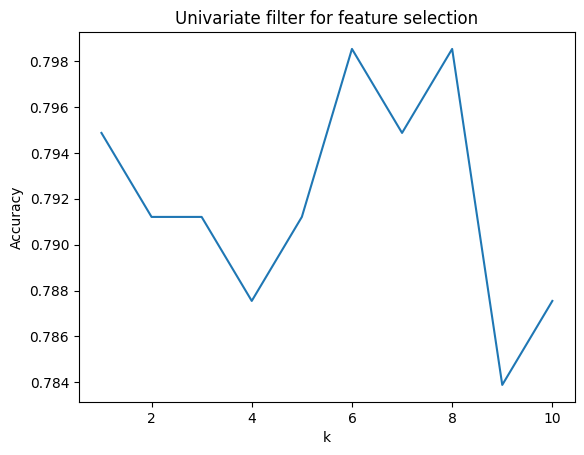

In [ ]:
# Use the filter approach for feature selection
ks = np.arange(1, 11, 1)
accs = []
clf = SVC(kernel='linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)
for k in ks:
    print('--------------- Filter feature selection, k =', k)

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(xRcc, yRcc):

       # Training phase
        x_train = xRcc[train_index, :]
        y_train = yRcc[train_index]

        ffs = SelectKBest(mutual_info_classif, k=k)
        ffs.fit(x_train, y_train)
        x_train = ffs.transform(x_train)

        clf.fit(x_train, y_train)

        # Test phase
        x_test = ffs.transform(xRcc[test_index, :])
        y_test = yRcc[test_index]
        y_pred = clf.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    acc = accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))
    rec = recall_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)
    pre = precision_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)

    print('ACC: ', acc, 'Recall: ', rec, 'Precision: ', pre)
    accs.append(acc)

plt.plot(ks, accs)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Univariate filter for feature selection')
plt.show()

##Aprendizaje por transferencia

Para esta etapa del proyecto, consideren únicamente los datos del experimento de P300. Para al menos dos clasificadores probados en el paso anterior, entrenen el modelo con uno de los archivos de datos de uno de los sujetos, y prueben dicho modelo con otro de los archivos de datos de otra persona. Reporte el rendimiento del modelo.

Conteste las siguientes preguntas:

- ¿Es posible entrenar un modelo de clasificación con los datos de un sujeto y obtener buenos resultados con los datos de otro sujeto? ¿Por qué?
- ¿Consideras que debes hacer ajustes cuando tengas datos de otro sujeto?

Clasificador SVM

In [ ]:
# Datos de entrenamiento: Antonio
X_train = xA
y_train = yA

# Datos de prueba: Mayra
X_test = xM
y_test = yM

# Creación del modelo SVM radial
model = SVC(kernel='rbf')

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Prueba del modelo
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.08      0.02      0.03        92
           2       0.79      0.93      0.86       364

    accuracy                           0.75       456
   macro avg       0.43      0.48      0.45       456
weighted avg       0.65      0.75      0.69       456



Clasificador KNN

In [ ]:
# Datos de entrenamiento: Antonio
X_train = xA
y_train = yA

# Datos de prueba: Mayra
X_test = xM
y_test = yM

# Creación del modelo KNN
model = KNeighborsClassifier(n_neighbors = 5)

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Prueba del modelo
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.11      0.02      0.04        92
           2       0.79      0.95      0.87       364

    accuracy                           0.77       456
   macro avg       0.45      0.49      0.45       456
weighted avg       0.66      0.77      0.70       456



Clasificador Random Forest Classifier

In [ ]:
# Datos de entrenamiento: Antonio
X_train = xA
y_train = yA

# Datos de prueba: Mayra
X_test = xM
y_test = yM

# Creación del clasificador Random Forest
model = RandomForestClassifier()

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Prueba del modelo
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.06      0.01      0.02        92
           2       0.79      0.96      0.87       364

    accuracy                           0.77       456
   macro avg       0.43      0.48      0.44       456
weighted avg       0.65      0.77      0.70       456




- ¿Es posible entrenar un modelo de clasificación con los datos de un sujeto y obtener buenos resultados con los datos de otro sujeto? ¿Por qué?

Sí es posible, en un caso en el que las bases de datos estén balanceadas y los sujetos no tengan datos tan dispersos. Sin embargo, este no es el caso y por esto, el accuracy es un poco bajo. Como se puede observar en los 3 modelos de clasificación tenía alrededor de 75 de accuracy, influye mucho que las bases de datos no estén balanceadas, al igual que influye mucho las diferencias que tengan las características y datos de los sujetos.

- ¿Consideras que debes hacer ajustes cuando tengas datos de otro sujeto?

Sí, se deben hacer varios ajustes para poder tener un buen accuracy. Alguna de esos ajustes son:

a) La estandarización y normalización de los datos.

b) Utilizar la validación cruzeada.

c) Balancear las bases de datos.

d) Inferir datos adicionales por medio de la inteligencia artificial.

e) Utilizar el aprendizaje por transferencia.